# B3737

In [1]:
%load_ext autoreload
%autoreload 2
%run ../draw_functions.py
%run ../kstest.py

In [2]:
from draw_functions import *
from kstest import *

In [3]:
#read csv
df = pd.read_csv('../csv/MX224020517TW01.csv')

#ajout du slope
df['slope'] = df.groupby('ResultCurve_id').apply(lambda group: group['xvalue'].diff() / group['xtime'].diff(), include_groups=False).reset_index(level=0, drop=True)
df_02_08 = df[(df['xtime'] >= 0.2) & (df['xtime'] <= 0.8)]
df

,OrderNo,Batch,Sample_Code,ResultCurve_id,xtime,xvalue,slope
0,MX224020517TW01,173703B,O1500VB5C,644A1C70-8059-4EED-928B-0607FE809D94,0.419600,2.600312,NaN
1,MX224020517TW01,173703B,O1500VB5C,644A1C70-8059-4EED-928B-0607FE809D94,0.433333,2.824625,16.333463
2,MX224020517TW01,173703B,O1500VB5C,644A1C70-8059-4EED-928B-0607FE809D94,0.463333,3.434744,20.337301
3,MX224020517TW01,173703B,O1500VB5C,644A1C70-8059-4EED-928B-0607FE809D94,0.466333,3.502535,22.597001
4,MX224020517TW01,173703B,O1500VB5C,644A1C70-8059-4EED-928B-0607FE809D94,0.472333,3.638117,22.597001
...,...,...,...,...,...,...,...
834,MX224020517TW01,171501B,O1500V2IQ,B5E9A2CC-545B-4A77-933C-E9A43647911B,0.699333,10.100106,28.736564
835,MX224020517TW01,171501B,O1500V2IQ,B5E9A2CC-545B-4A77-933C-E9A43647911B,0.731667,11.004739,27.978349
836,MX224020517TW01,171501B,O1500V2IQ,B5E9A2CC-545B-4A77-933C-E9A43647911B,0.769267,12.004431,26.587535
837,MX224020517TW01,171501B,O1500V2IQ,B5E9A2CC-545B-4A77-933C-E9A43647911B,0.785303,12.417052,25.730349


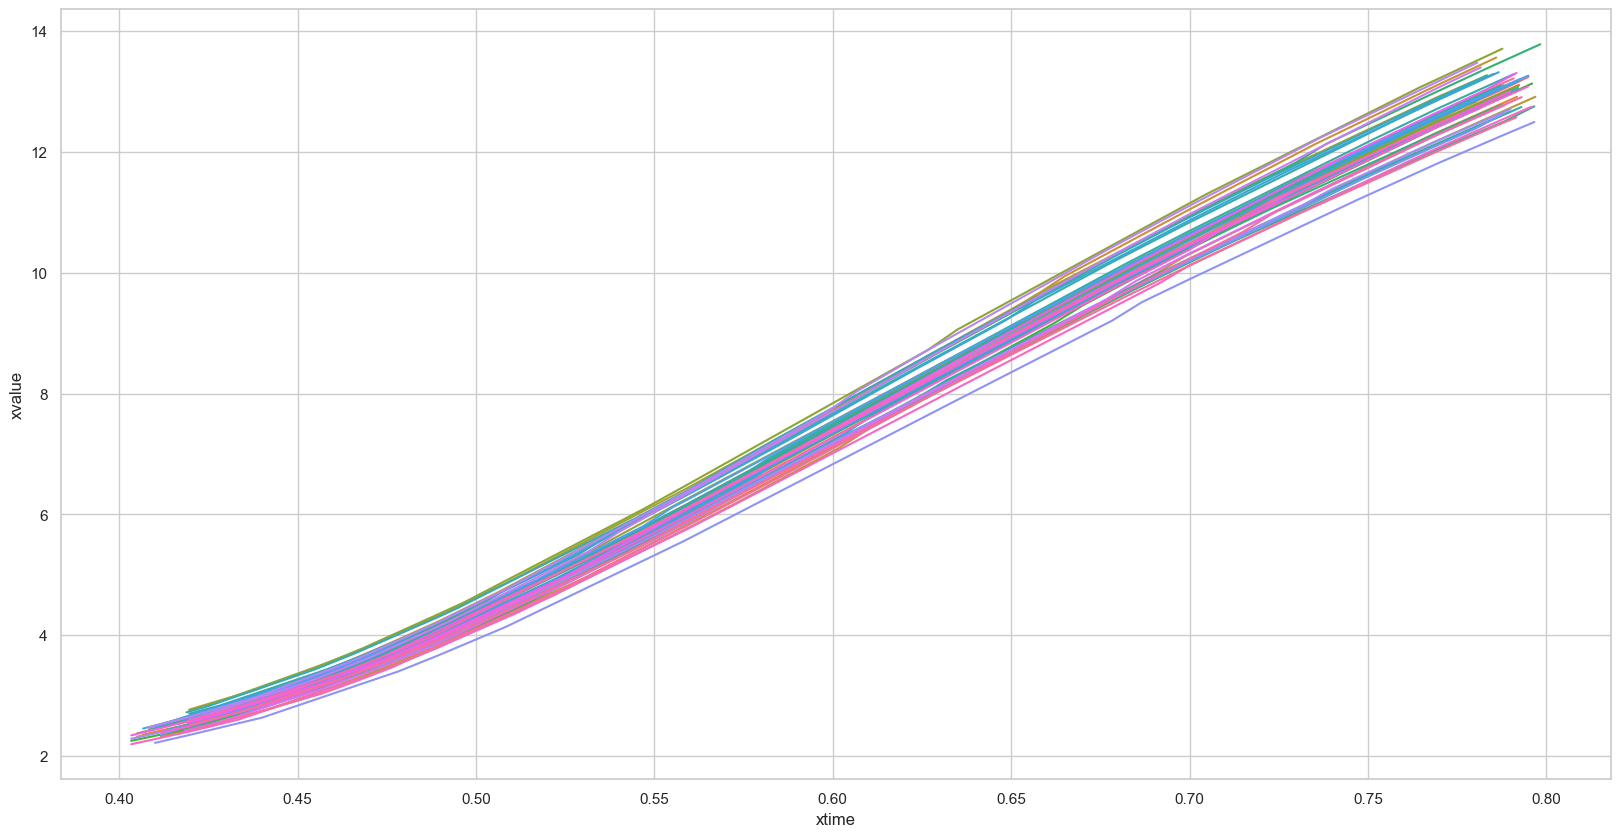

In [4]:
dessiner_commande(df)

## Analyse des pentes

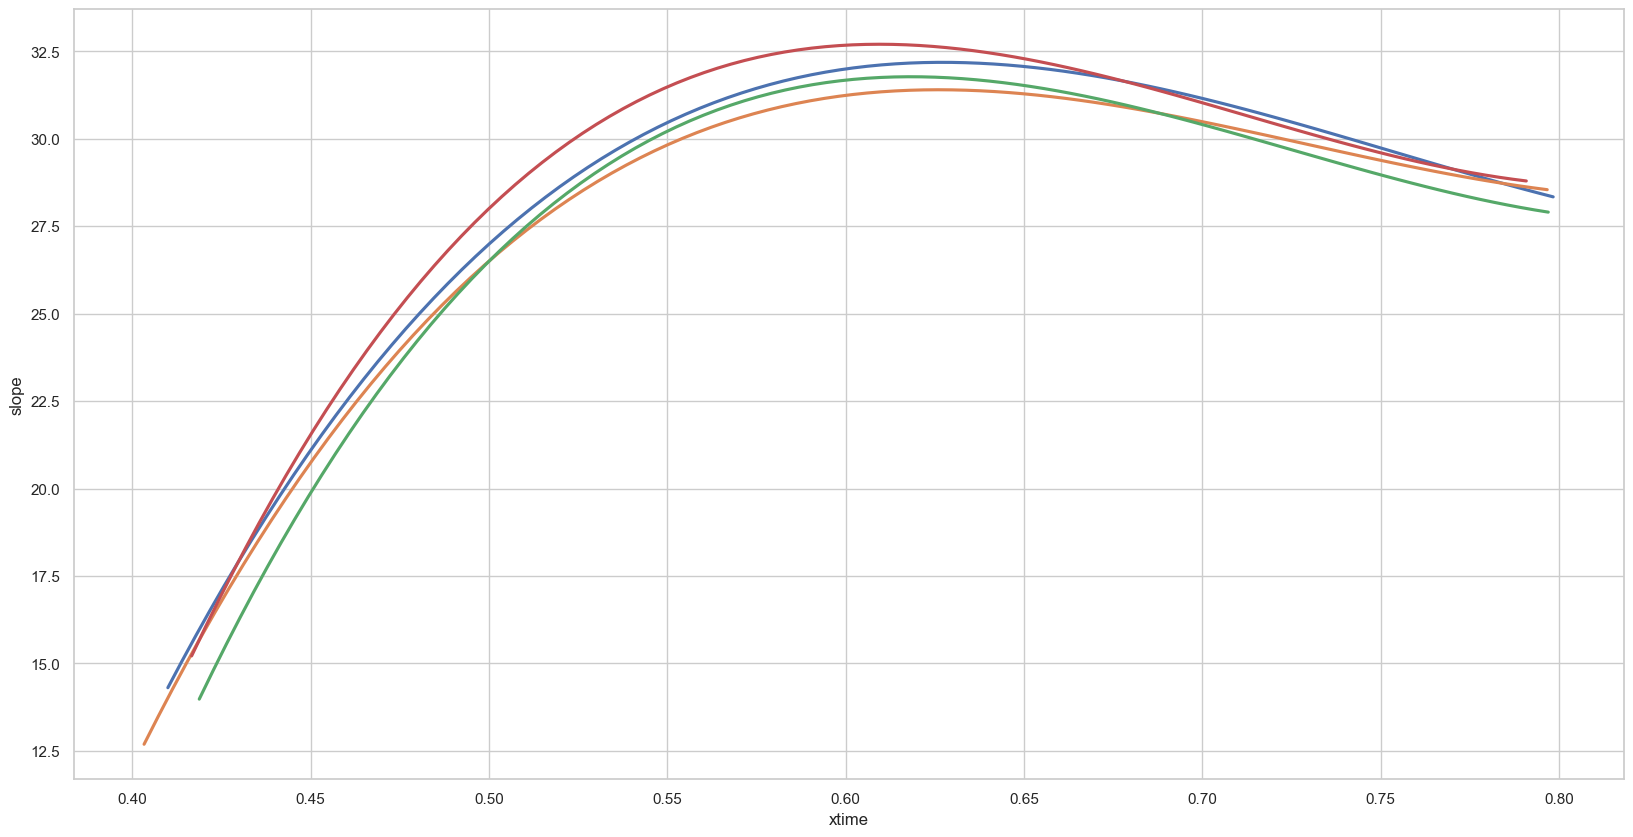

In [5]:
dessiner_commande_slope(df, 3, unified=True)

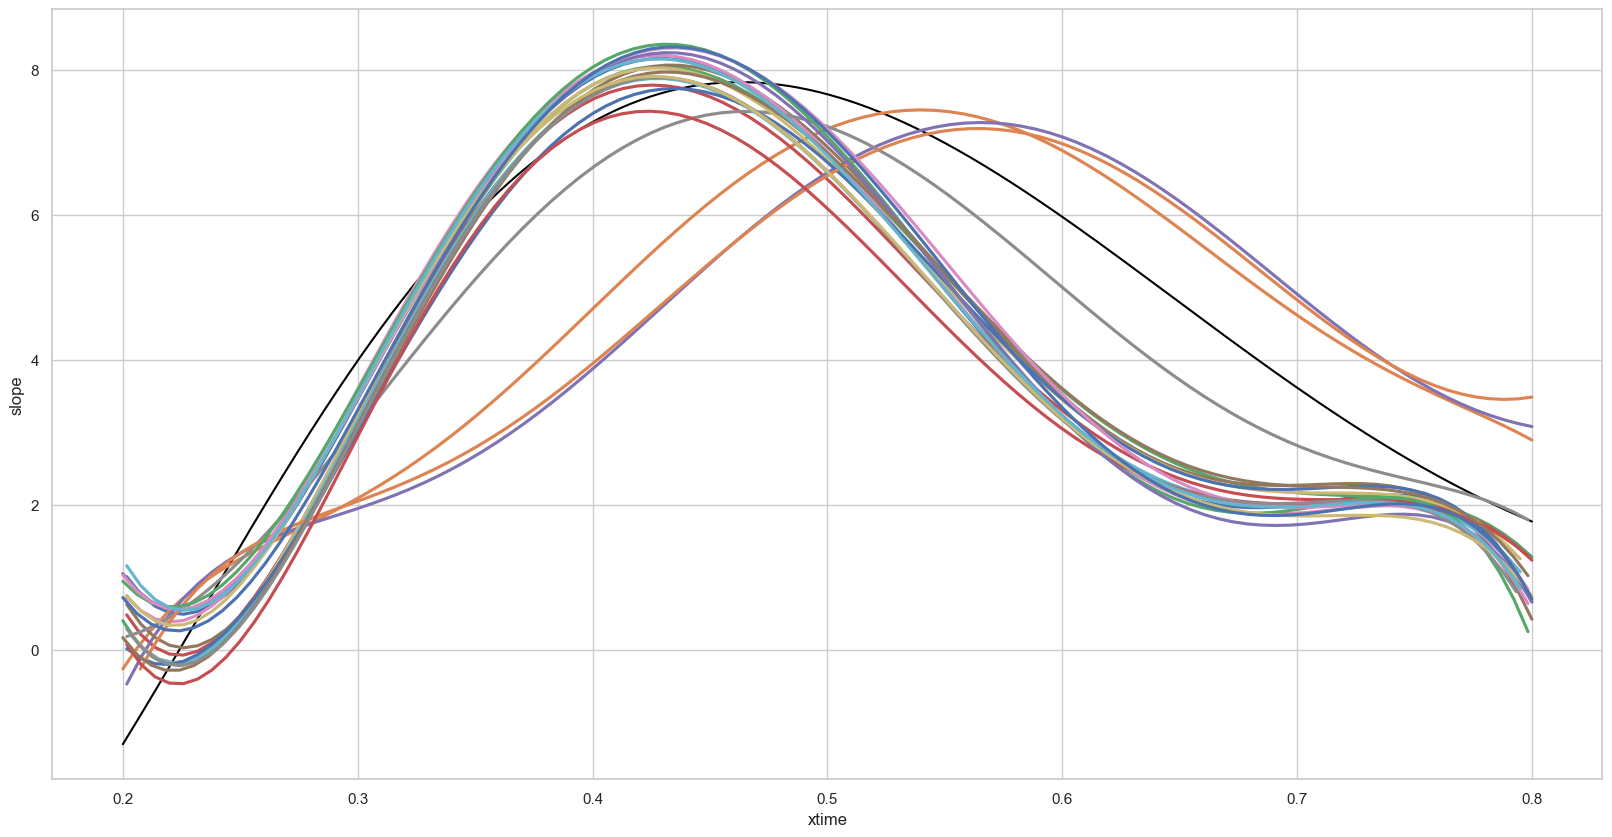

In [61]:
dessiner_commande_slope(df_02_08, 6, c_type=True, unified=True, p_slope_type=p_slope_type)

## Test Type

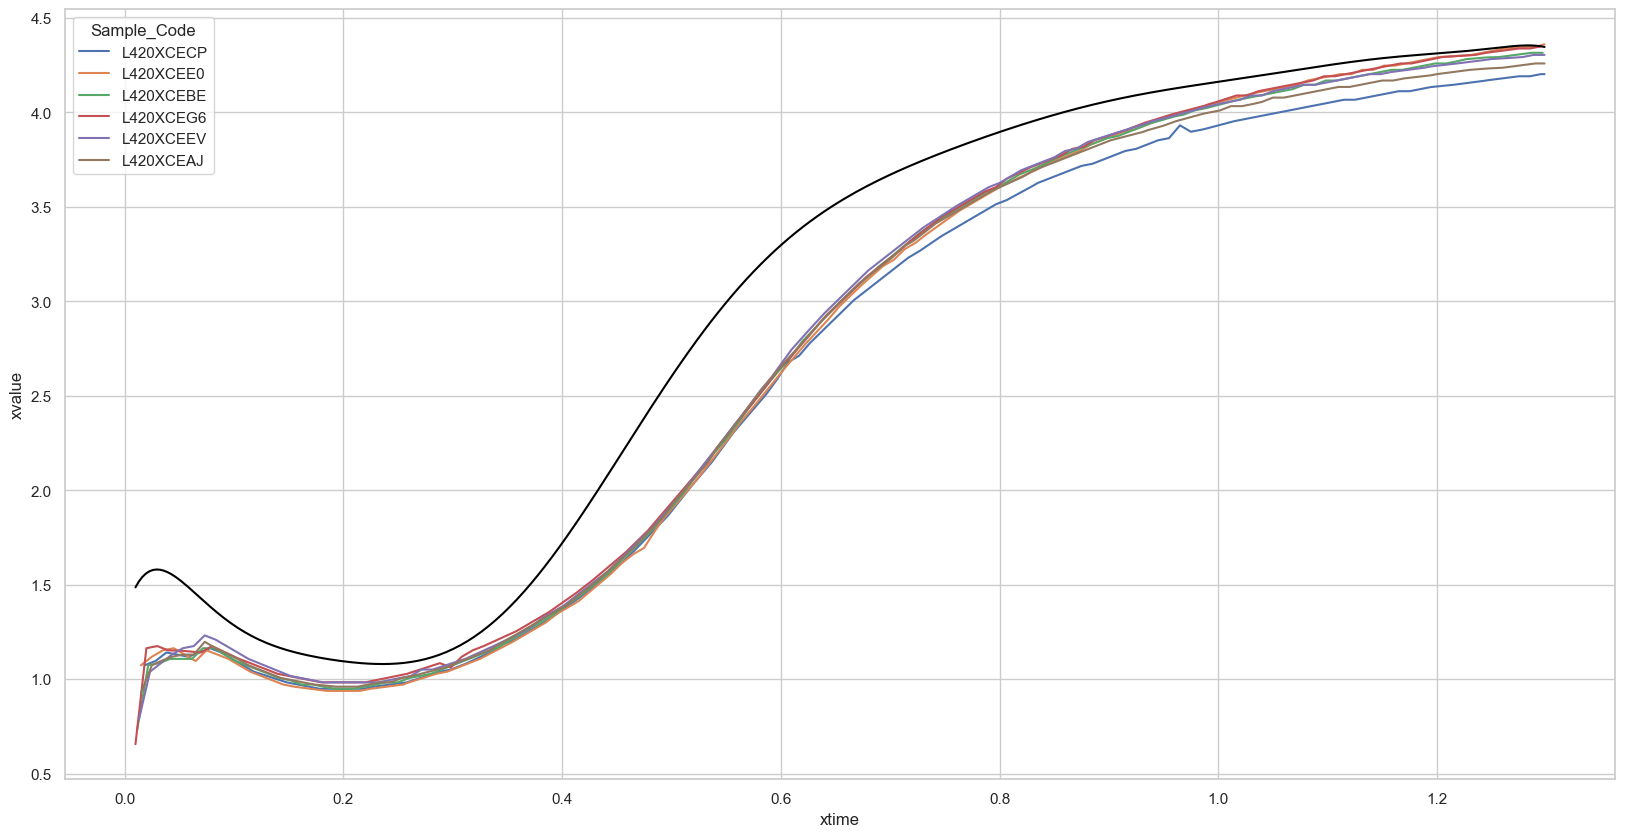

In [63]:
dessiner_batch(df, '102315B', c_type=12, ptype=ptype)

- Batch 094111B: 123.71348354199117
- Batch 092009B: 105.87146699125394
- Batch 085907B: 105.44860287953193
- Batch 093110B: 103.7364261111518
- Batch 090908B: 89.86326174277578
- Batch 112321B: 87.03527412265765
- Batch 095312B: 84.71132651511111
- Batch 082003B: 84.64870162840432
- Batch 075901B: 84.59328306116826
- Batch 100313B: 81.4913333150759
- Batch 111520B: 79.9998649935005
- Batch 081002B: 79.71213389091903
- Batch 110519B: 68.60351043386478
- Batch 105418B: 66.04135493620323
- Batch 082904B: 63.3369941053528
- Batch 084606B: 62.479574624633045
- Batch 083905B: 46.7556250312039
- Batch 101214B: 41.14661199816313
- Batch 104317B: 20.372489072053533
- Batch 103316B: 18.176970088517564
- Batch 102315B: 11.224872084711455


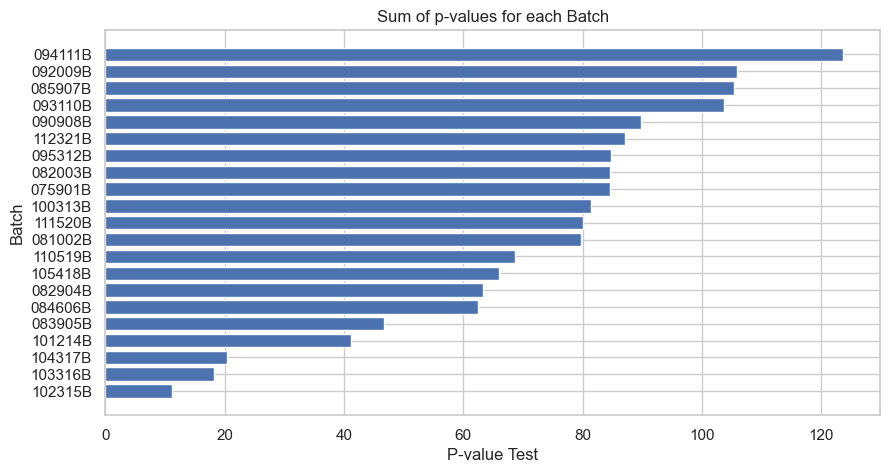

In [32]:
batch_pvalues = ks_batch_test_type_value(df, 12, ptype)

visualiser_batch_pvalue(batch_pvalues, log=True)

In [8]:
# Trouver le xtime correspondant au max de la pente pour chaque groupe
max_slope_sample_xtime = df_02_08.loc[df_02_08.groupby('Sample_Code')['slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']
max_slope_batch_xtime = max_slope_sample_xtime.groupby('Batch').median()

# Calculer la médiane de xtime pour chaque groupe
median_xtime = max_slope_sample_xtime.median()

# Calculer la différence entre le xtime du max de la pente et la médiane de xtime pour chaque groupe
diff = max_slope_batch_xtime - 0.4649999999999999

# Sort the differences by their absolute values in descending order
diff_sorted = diff.abs().sort_values(ascending=False)

# Print the differences in the sorted order
for batch in diff_sorted.index:
    print(f"La différence de temps entre le max de la pente et la médiane pour le batch {batch} est : {round(diff_sorted[batch]*60,3)} seconde")

La différence de temps entre le max de la pente et la médiane pour le batch 102315B est : 6.617 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 104317B est : 6.2 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 103316B est : 5.71 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 110519B est : 2.917 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 082003B est : 2.895 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 095312B est : 2.602 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 093110B est : 2.5 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 111520B est : 2.486 seconde
La différence de temps entre le max de la pente et la médiane pour le batch 090908B est : 2.283 seconde
La différence de temps entre le max de la pente et la médiane pour le

In [9]:
round(np.std(max_slope_batch_xtime)*1000,2)

49.19

In [21]:
max_slope_batch_xtime

Batch
075901B    0.428333
081002B    0.432500
082003B    0.421900
082904B    0.429167
083905B    0.443333
084606B    0.461667
085907B    0.436667
090908B    0.427500
092009B    0.435000
093110B    0.427500
094111B    0.431667
095312B    0.415467
100313B    0.432500
101214B    0.445833
102315B    0.599167
103316B    0.555000
104317B    0.589167
105418B    0.427500
110519B    0.415833
111520B    0.418333
112321B    0.448333
Name: xtime, dtype: float64

In [9]:
df_04_08 = df[(df['xtime'] > 0.4) & (df['xtime'] < 0.8)]
for sample in df_04_08['Sample_Code'].unique():
    df_sample = df_04_08[df_04_08['Sample_Code'] == sample]

    z1 = np.polyfit(df_sample['xtime'], df_sample['slope'], 6)
    p1 = np.poly1d(z1)

    # Update the 'fitted_slope' in df_data for the current sample
    df_04_08.loc[df_04_08['Sample_Code'] == sample, 'fitted_slope'] = p1(df_sample['xtime'])

# I want a new dataframe with three columns: OrderNo, std_dev_batch, std_dev_sample
df_std_dev = pd.DataFrame(columns=['std_dev_batch', 'std_dev_sample'])

max_slope_sample_xtime = df_04_08.loc[df_04_08.groupby('Sample_Code')['fitted_slope'].idxmax()][['Batch', 'xtime']].set_index('Batch')['xtime']
max_slope_batch_xtime = max_slope_sample_xtime.groupby('Batch').median()

std_dev_batch = round(np.std(max_slope_batch_xtime) * 1000, 2)
std_dev_sample = round(np.std(max_slope_sample_xtime) * 1000, 2)

df_std_dev.loc[len(df_std_dev)] = [std_dev_batch, std_dev_sample]

df_std_dev

,std_dev_batch,std_dev_sample
0,23.89,42.2
